In [1]:
from main_extractor import *
from utils.text_feature import *
from utils.dict_lib import *

fs = [TextFeature("rank", "mean_key"), TextFeature("words", "select_keys_proportion", args=("я", "ты")), 
      TextFeature("parts", "select_keys_proportion", args=("VERB",)), TextFeature("len_words", "mean_key", args=(16,)),
      TextFeature("homogeneity", "mean_key", args=(100,))]

d = text2fеatures("1813\\3", fs)
print(d)

d = important_feature("words", n_top=30, rang=(2, 5))
print(d)
print(len(d))

d = important_feature("n_grams_letter", n_top=40, rang=(3, 5))
print(d)
print(count_features(fs))
print(get_names(fs))

[0.1004481418852913, 0.03561643835616438, 0.03561643835616438, 0.18904109589041096, 0.292722602739726, 0.13]
{'друг': 4, 'о': 4, 'любовь': 3, 'вы': 5, 'всё': 2, 'рука': 2, 'весь': 5, 'а': 5, 'где': 4, 'душа': 3, 'день': 2, 'от': 2, 'они': 5, 'его': 2, 'то': 5, 'да': 2, 'так': 3, 'кто': 2, 'нет': 2, 'тот': 2}
20
{'нны': 4, 'дру': 5, 'рас': 4, 'лен': 4, 'руг': 4, 'ель': 3, 'люб': 4, 'вет': 4, 'тра': 3, 'под': 5, 'что': 5, 'нас': 3, 'нов': 5, 'нье': 4, 'его': 5, 'льн': 3, 'как': 5, 'сво': 3, 'раз': 4, 'ово': 5, 'мен': 3, 'одн': 3, 'она': 4}
6
['rank', 'words/я', 'words/ты', 'parts/VERB', 'len_words', 'homogeneity']


In [1]:
from models.data import *
from periods import *

fs = [TextFeature("len_words", "mean_key", args=(25,)), TextFeature("homogeneity", "mean_key", args=(100,)), TextFeature("rank", "mean_key"), 
      TextFeature("words", "select_keys_proportion", args=("любовь", "друг", "вы", "мы", "он", "они")),
      TextFeature("puncts", "select_keys_proportion", args=("!",)),
      TextFeature("parts", "select_keys_proportion", args=("PRON", "PROPN")), 
      TextFeature("rels", "select_keys_proportion", args=("nsubj", "advmod", "amod", "obl", "nmod")),
      TextFeature("n_grams_all_symb", "select_keys_proportion", args=(" не", "не ", " мо")),
      TextFeature("n_grams_letter", "select_keys_proportion", args=("ста", "его"))]

big_per1 = sum(periods[:2], [])
big_per2 = sum(periods[2:], [])
pers = [big_per1, big_per2]

data = get_data(pers, fs, [0, 1], train_part=0.8, val_part=0.1, not_null_bord=14)
print(data.size())

463


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 16)                368       
                                                                 
 dense_11 (Dense)            (None, 12)                204       
                                                                 
 dense_12 (Dense)            (None, 6)                 78        
                                                                 
 dense_13 (Dense)            (None, 4)                 28        
                                                                 
 dense_14 (Dense)            (None, 1)                 5         
                                                                 
Total params: 683
Trainable params: 683
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
12/12 [==============================] - 1s 

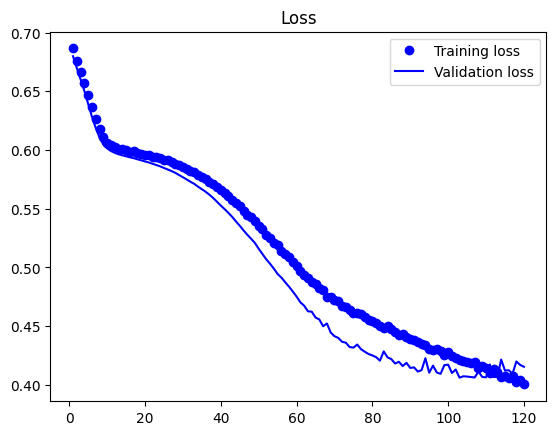

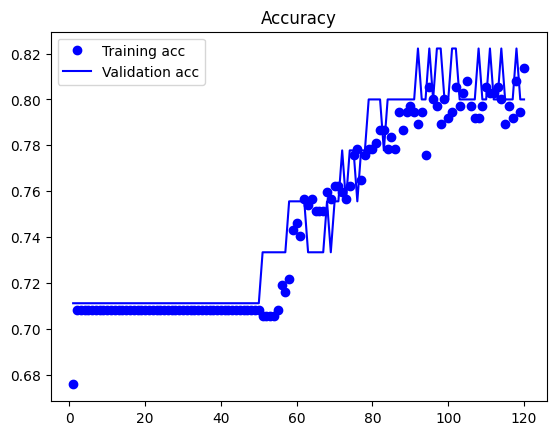

In [4]:
from models.fit import fit
from models.models import get_model1
from utils.text_feature import count_features

epochs = 120
model = get_model1(count_features(fs))
model.summary()
fit(model, data, epochs)

In [5]:
from models.data import *

data.save('data2')

In [6]:
model.save(root + "models\\saved_models\\2per(1820) acc0.791 data2.keras")

model.evaluate(data.x_val+data.x_test, data.y_val+data.y_test)

3/3 [==============================] - 0s 5ms/step - loss: 0.4265 - acc: 0.7957


[0.4265146255493164, 0.7956989407539368]

3/3 [==============================] - 0s 2ms/step
threshold 0.0: acc = 0.7096774193548387, precision = 0.7096774193548387, recall = 1.0, f1 = 0.8301886792452831, fpr = 1.0
threshold 0.05: acc = 0.7096774193548387, precision = 0.7096774193548387, recall = 1.0, f1 = 0.8301886792452831, fpr = 1.0
threshold 0.1: acc = 0.7096774193548387, precision = 0.7096774193548387, recall = 1.0, f1 = 0.8301886792452831, fpr = 1.0
threshold 0.15: acc = 0.7204301075268817, precision = 0.717391304347826, recall = 1.0, f1 = 0.8354430379746834, fpr = 0.9629629629629629
threshold 0.2: acc = 0.7204301075268817, precision = 0.7222222222222222, recall = 0.9848484848484849, f1 = 0.8333333333333333, fpr = 0.9259259259259259
threshold 0.25: acc = 0.7526881720430108, precision = 0.7471264367816092, recall = 0.9848484848484849, f1 = 0.8496732026143791, fpr = 0.8148148148148148
threshold 0.3: acc = 0.7849462365591398, precision = 0.7804878048780488, recall = 0.9696969696969697, f1 = 0.8648648648648648, fpr = 0.66666

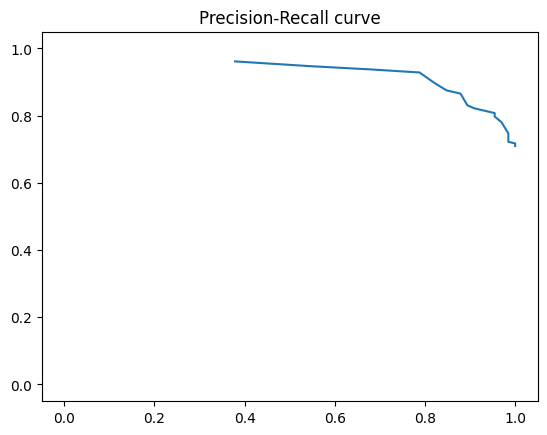

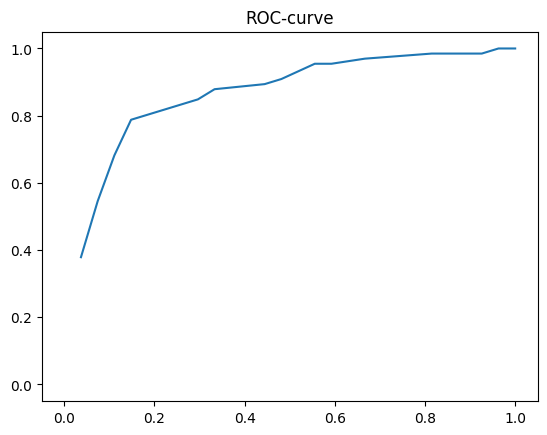

In [7]:
from keras import models
from models.data import *
from models.fit import show_metrics

#data = load_data('data1')
#loaded_model = models.load_model(root + "models\\saved_models\\2per(1824) acc0.758 data1.keras")
loaded_model = model
loaded_model.evaluate(data.x_val+data.x_test, data.y_val+data.y_test)
predicts = loaded_model.predict(data.x_val+data.x_test)
show_metrics(predicts, data.y_val+data.y_test)

2/2 [==============================] - 0s 12ms/step
threshold 0.0: acc = 0.4838709677419355, precision = 0.4838709677419355, recall = 1.0, f1 = 0.6521739130434783, fpr = 1.0
threshold 0.05: acc = 0.4838709677419355, precision = 0.4838709677419355, recall = 1.0, f1 = 0.6521739130434783, fpr = 1.0
threshold 0.1: acc = 0.4838709677419355, precision = 0.4838709677419355, recall = 1.0, f1 = 0.6521739130434783, fpr = 1.0
threshold 0.15: acc = 0.4838709677419355, precision = 0.4838709677419355, recall = 1.0, f1 = 0.6521739130434783, fpr = 1.0
threshold 0.2: acc = 0.4838709677419355, precision = 0.4838709677419355, recall = 1.0, f1 = 0.6521739130434783, fpr = 1.0
threshold 0.25: acc = 0.4838709677419355, precision = 0.4838709677419355, recall = 1.0, f1 = 0.6521739130434783, fpr = 1.0
threshold 0.3: acc = 0.5, precision = 0.4918032786885246, recall = 1.0, f1 = 0.6593406593406593, fpr = 0.96875
threshold 0.35: acc = 0.5161290322580645, precision = 0.5, recall = 0.9666666666666667, f1 = 0.6590909

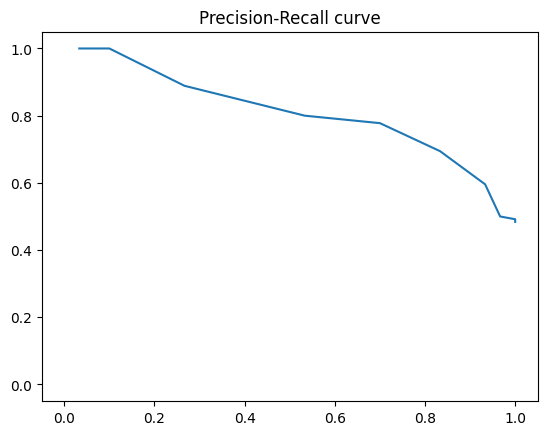

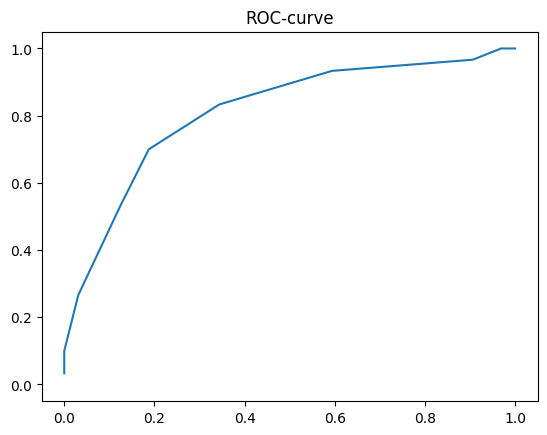

In [8]:
data = load_data('data1')
loaded_model = models.load_model(root + "models\\saved_models\\2per(1824) acc0.758 data1.keras")

loaded_model.evaluate(data.x_val+data.x_test, data.y_val+data.y_test)
predicts = loaded_model.predict(data.x_val+data.x_test)
show_metrics(predicts, data.y_val+data.y_test)

15/15 [==============================] - 0s 1ms/step


Using 463 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
  0%|                                                                                          | 0/463 [00:00<?, ?it/s]

30269/30269 [==============================] - 29s 950us/step


  0%|▏                                                                               | 1/463 [00:49<6:22:16, 49.65s/it]

30269/30269 [==============================] - 27s 880us/step


  0%|▎                                                                               | 2/463 [01:31<5:48:28, 45.36s/it]

30269/30269 [==============================] - 27s 887us/step


  1%|▌                                                                               | 3/463 [02:14<5:38:28, 44.15s/it]

30269/30269 [==============================] - 27s 881us/step


  1%|▋                                                                               | 4/463 [02:57<5:32:17, 43.44s/it]

30269/30269 [==============================] - 27s 888us/step


  1%|▊                                                                               | 5/463 [03:39<5:29:28, 43.16s/it]

30269/30269 [==============================] - 27s 882us/step


  1%|█                                                                               | 6/463 [04:22<5:28:18, 43.10s/it]

30269/30269 [==============================] - 28s 918us/step


  2%|█▏                                                                              | 7/463 [05:06<5:28:59, 43.29s/it]

30269/30269 [==============================] - 27s 877us/step


  2%|█▍                                                                              | 8/463 [05:48<5:25:31, 42.93s/it]

30269/30269 [==============================] - 27s 878us/step


  2%|█▌                                                                              | 9/463 [06:31<5:23:44, 42.79s/it]

30269/30269 [==============================] - 27s 879us/step


  2%|█▋                                                                             | 10/463 [07:13<5:21:52, 42.63s/it]

30269/30269 [==============================] - 26s 873us/step


  2%|█▉                                                                             | 11/463 [07:55<5:20:07, 42.49s/it]

30269/30269 [==============================] - 27s 879us/step


  3%|██                                                                             | 12/463 [08:38<5:19:31, 42.51s/it]

30269/30269 [==============================] - 27s 884us/step


  3%|██▏                                                                            | 13/463 [09:20<5:18:42, 42.49s/it]

30269/30269 [==============================] - 27s 887us/step


  3%|██▍                                                                            | 14/463 [10:03<5:18:06, 42.51s/it]

30269/30269 [==============================] - 27s 877us/step


  3%|██▌                                                                            | 15/463 [10:45<5:16:56, 42.45s/it]

30269/30269 [==============================] - 27s 887us/step


  3%|██▋                                                                            | 16/463 [11:28<5:16:49, 42.53s/it]

30269/30269 [==============================] - 27s 886us/step


  4%|██▉                                                                            | 17/463 [12:10<5:16:32, 42.58s/it]

30269/30269 [==============================] - 27s 893us/step


  4%|███                                                                            | 18/463 [12:54<5:17:36, 42.82s/it]

30269/30269 [==============================] - 31s 1ms/step


  4%|███▏                                                                           | 19/463 [13:43<5:31:42, 44.83s/it]

30269/30269 [==============================] - 29s 971us/step


  4%|███▍                                                                           | 20/463 [14:29<5:32:30, 45.04s/it]

30269/30269 [==============================] - 35s 1ms/step


  5%|███▌                                                                           | 21/463 [15:22<5:49:12, 47.40s/it]

30269/30269 [==============================] - 35s 1ms/step


  5%|███▊                                                                           | 22/463 [16:13<5:57:35, 48.65s/it]

30269/30269 [==============================] - 31s 1ms/step


  5%|███▉                                                                           | 23/463 [17:01<5:54:36, 48.35s/it]

30269/30269 [==============================] - 31s 1ms/step


  5%|████                                                                           | 24/463 [17:48<5:51:29, 48.04s/it]

30269/30269 [==============================] - 28s 932us/step


  5%|████▎                                                                          | 25/463 [18:33<5:42:56, 46.98s/it]

30269/30269 [==============================] - 31s 1ms/step


  6%|████▍                                                                          | 26/463 [19:19<5:40:48, 46.79s/it]

30269/30269 [==============================] - 30s 986us/step


  6%|████▌                                                                          | 27/463 [20:05<5:37:43, 46.48s/it]

30269/30269 [==============================] - 36s 1ms/step


  6%|████▊                                                                          | 28/463 [20:57<5:49:32, 48.21s/it]

30269/30269 [==============================] - 31s 1ms/step


  6%|████▉                                                                          | 29/463 [21:44<5:46:03, 47.84s/it]

30269/30269 [==============================] - 33s 1ms/step


  6%|█████                                                                          | 30/463 [22:34<5:50:34, 48.58s/it]

30269/30269 [==============================] - 31s 1ms/step


  7%|█████▎                                                                         | 31/463 [23:21<5:45:49, 48.03s/it]

30269/30269 [==============================] - 28s 918us/step


  7%|█████▍                                                                         | 32/463 [24:05<5:35:28, 46.70s/it]

30269/30269 [==============================] - 28s 918us/step


  7%|█████▋                                                                         | 33/463 [24:48<5:27:24, 45.68s/it]

30269/30269 [==============================] - 37s 1ms/step


  7%|█████▊                                                                         | 34/463 [25:48<5:57:46, 50.04s/it]

30269/30269 [==============================] - 28s 919us/step


  8%|█████▉                                                                         | 35/463 [26:32<5:42:48, 48.06s/it]

30269/30269 [==============================] - 27s 905us/step


  8%|██████▏                                                                        | 36/463 [27:15<5:32:12, 46.68s/it]

30269/30269 [==============================] - 28s 916us/step


  8%|██████▎                                                                        | 37/463 [27:58<5:24:04, 45.65s/it]

30269/30269 [==============================] - 27s 897us/step


  8%|██████▍                                                                        | 38/463 [28:41<5:17:05, 44.77s/it]

30269/30269 [==============================] - 27s 898us/step


  8%|██████▋                                                                        | 39/463 [29:24<5:12:03, 44.16s/it]

30269/30269 [==============================] - 27s 888us/step


  9%|██████▊                                                                        | 40/463 [30:06<5:07:28, 43.61s/it]

30269/30269 [==============================] - 27s 895us/step


  9%|██████▉                                                                        | 41/463 [30:49<5:05:14, 43.40s/it]

30269/30269 [==============================] - 27s 892us/step


  9%|███████▏                                                                       | 42/463 [31:31<5:02:30, 43.11s/it]

30269/30269 [==============================] - 27s 893us/step


  9%|███████▎                                                                       | 43/463 [32:14<5:01:03, 43.01s/it]

30269/30269 [==============================] - 27s 898us/step


 10%|███████▌                                                                       | 44/463 [32:57<4:59:37, 42.91s/it]

30269/30269 [==============================] - 27s 895us/step


 10%|███████▋                                                                       | 45/463 [33:39<4:58:10, 42.80s/it]

30269/30269 [==============================] - 27s 901us/step


 10%|███████▊                                                                       | 46/463 [34:23<4:58:26, 42.94s/it]

30269/30269 [==============================] - 27s 893us/step


 10%|████████                                                                       | 47/463 [35:05<4:57:07, 42.85s/it]

30269/30269 [==============================] - 27s 894us/step


 10%|████████▏                                                                      | 48/463 [35:48<4:56:18, 42.84s/it]

30269/30269 [==============================] - 27s 899us/step


 11%|████████▎                                                                      | 49/463 [36:31<4:55:31, 42.83s/it]

30269/30269 [==============================] - 27s 894us/step


 11%|████████▌                                                                      | 50/463 [37:14<4:55:07, 42.87s/it]

30269/30269 [==============================] - 27s 892us/step


 11%|████████▋                                                                      | 51/463 [37:56<4:53:35, 42.76s/it]

30269/30269 [==============================] - 27s 894us/step


 11%|████████▊                                                                      | 52/463 [38:39<4:52:41, 42.73s/it]

30269/30269 [==============================] - 27s 900us/step


 11%|█████████                                                                      | 53/463 [39:22<4:52:16, 42.77s/it]

30269/30269 [==============================] - 27s 896us/step


 12%|█████████▏                                                                     | 54/463 [40:05<4:51:12, 42.72s/it]

30269/30269 [==============================] - 27s 898us/step


 12%|█████████▍                                                                     | 55/463 [40:47<4:50:38, 42.74s/it]

30269/30269 [==============================] - 27s 902us/step


 12%|█████████▌                                                                     | 56/463 [41:30<4:49:58, 42.75s/it]

30269/30269 [==============================] - 27s 897us/step


 12%|█████████▋                                                                     | 57/463 [42:13<4:49:45, 42.82s/it]

30269/30269 [==============================] - 28s 909us/step


 13%|█████████▉                                                                     | 58/463 [42:56<4:49:25, 42.88s/it]

30269/30269 [==============================] - 27s 904us/step


 13%|██████████                                                                     | 59/463 [43:39<4:49:01, 42.92s/it]

30269/30269 [==============================] - 27s 904us/step


 13%|██████████▏                                                                    | 60/463 [44:22<4:48:09, 42.90s/it]

30269/30269 [==============================] - 27s 900us/step


 13%|██████████▍                                                                    | 61/463 [45:05<4:47:22, 42.89s/it]

30269/30269 [==============================] - 28s 911us/step


 13%|██████████▌                                                                    | 62/463 [45:48<4:47:09, 42.97s/it]

30269/30269 [==============================] - 27s 898us/step


 14%|██████████▋                                                                    | 63/463 [46:31<4:45:54, 42.89s/it]

30269/30269 [==============================] - 29s 947us/step


 14%|██████████▉                                                                    | 64/463 [47:15<4:47:43, 43.27s/it]

30269/30269 [==============================] - 27s 901us/step


 14%|███████████                                                                    | 65/463 [47:58<4:45:59, 43.11s/it]

30269/30269 [==============================] - 28s 909us/step


 14%|███████████▎                                                                   | 66/463 [48:41<4:45:06, 43.09s/it]

30269/30269 [==============================] - 28s 908us/step


 14%|███████████▍                                                                   | 67/463 [49:23<4:43:55, 43.02s/it]

30269/30269 [==============================] - 27s 903us/step


 15%|███████████▌                                                                   | 68/463 [50:06<4:43:11, 43.02s/it]

30269/30269 [==============================] - 28s 910us/step


 15%|███████████▊                                                                   | 69/463 [50:50<4:42:31, 43.02s/it]

30269/30269 [==============================] - 27s 899us/step


 15%|███████████▉                                                                   | 70/463 [51:32<4:41:41, 43.01s/it]

30269/30269 [==============================] - 28s 908us/step


 15%|████████████                                                                   | 71/463 [52:16<4:42:22, 43.22s/it]

30269/30269 [==============================] - 27s 906us/step


 16%|████████████▎                                                                  | 72/463 [52:59<4:41:13, 43.15s/it]

30269/30269 [==============================] - 28s 925us/step


 16%|████████████▍                                                                  | 73/463 [53:43<4:41:38, 43.33s/it]

30269/30269 [==============================] - 28s 914us/step


 16%|████████████▋                                                                  | 74/463 [54:26<4:40:33, 43.27s/it]

30269/30269 [==============================] - 28s 913us/step


 16%|████████████▊                                                                  | 75/463 [55:09<4:39:45, 43.26s/it]

30269/30269 [==============================] - 27s 902us/step


 16%|████████████▉                                                                  | 76/463 [55:52<4:38:22, 43.16s/it]

30269/30269 [==============================] - 28s 908us/step


 17%|█████████████▏                                                                 | 77/463 [56:35<4:37:43, 43.17s/it]

30269/30269 [==============================] - 28s 909us/step


 17%|█████████████▎                                                                 | 78/463 [57:18<4:36:47, 43.14s/it]

30269/30269 [==============================] - 28s 919us/step


 17%|█████████████▍                                                                 | 79/463 [58:02<4:36:18, 43.17s/it]

30269/30269 [==============================] - 28s 914us/step


 17%|█████████████▋                                                                 | 80/463 [58:45<4:35:48, 43.21s/it]

30269/30269 [==============================] - 27s 901us/step


 17%|█████████████▊                                                                 | 81/463 [59:28<4:34:07, 43.06s/it]

30269/30269 [==============================] - 28s 911us/step


 18%|█████████████▋                                                               | 82/463 [1:00:11<4:33:45, 43.11s/it]

30269/30269 [==============================] - 27s 905us/step


 18%|█████████████▊                                                               | 83/463 [1:00:54<4:32:32, 43.03s/it]

30269/30269 [==============================] - 28s 914us/step


 18%|█████████████▉                                                               | 84/463 [1:01:37<4:32:10, 43.09s/it]

30269/30269 [==============================] - 28s 911us/step


 18%|██████████████▏                                                              | 85/463 [1:02:20<4:31:35, 43.11s/it]

30269/30269 [==============================] - 27s 905us/step


 19%|██████████████▎                                                              | 86/463 [1:03:03<4:30:49, 43.10s/it]

30269/30269 [==============================] - 28s 907us/step


 19%|██████████████▍                                                              | 87/463 [1:03:46<4:29:57, 43.08s/it]

30269/30269 [==============================] - 28s 915us/step


 19%|██████████████▋                                                              | 88/463 [1:04:30<4:29:51, 43.18s/it]

30269/30269 [==============================] - 28s 913us/step


 19%|██████████████▊                                                              | 89/463 [1:05:13<4:29:22, 43.22s/it]

30269/30269 [==============================] - 27s 903us/step


 19%|██████████████▉                                                              | 90/463 [1:05:56<4:28:08, 43.13s/it]

30269/30269 [==============================] - 28s 914us/step


 20%|███████████████▏                                                             | 91/463 [1:06:39<4:27:36, 43.16s/it]

30269/30269 [==============================] - 28s 910us/step


 20%|███████████████▎                                                             | 92/463 [1:07:22<4:26:44, 43.14s/it]

30269/30269 [==============================] - 27s 904us/step


 20%|███████████████▍                                                             | 93/463 [1:08:05<4:25:57, 43.13s/it]

30269/30269 [==============================] - 27s 906us/step


 20%|███████████████▋                                                             | 94/463 [1:08:48<4:24:47, 43.06s/it]

30269/30269 [==============================] - 28s 917us/step


 21%|███████████████▊                                                             | 95/463 [1:09:32<4:24:59, 43.20s/it]

30269/30269 [==============================] - 28s 912us/step


 21%|███████████████▉                                                             | 96/463 [1:10:15<4:24:05, 43.17s/it]

30269/30269 [==============================] - 28s 912us/step


 21%|████████████████▏                                                            | 97/463 [1:10:58<4:23:16, 43.16s/it]

30269/30269 [==============================] - 28s 913us/step


 21%|████████████████▎                                                            | 98/463 [1:11:41<4:22:36, 43.17s/it]

30269/30269 [==============================] - 28s 917us/step


 21%|████████████████▍                                                            | 99/463 [1:12:24<4:22:00, 43.19s/it]

30269/30269 [==============================] - 28s 929us/step


 22%|████████████████▍                                                           | 100/463 [1:13:08<4:22:10, 43.34s/it]

30269/30269 [==============================] - 28s 915us/step


 22%|████████████████▌                                                           | 101/463 [1:13:51<4:21:20, 43.32s/it]

30269/30269 [==============================] - 28s 917us/step


 22%|████████████████▋                                                           | 102/463 [1:14:35<4:20:47, 43.35s/it]

30269/30269 [==============================] - 28s 910us/step


 22%|████████████████▉                                                           | 103/463 [1:15:18<4:19:42, 43.29s/it]

30269/30269 [==============================] - 28s 914us/step


 22%|█████████████████                                                           | 104/463 [1:16:01<4:19:11, 43.32s/it]

30269/30269 [==============================] - 28s 908us/step


 23%|█████████████████▏                                                          | 105/463 [1:16:44<4:17:43, 43.19s/it]

30269/30269 [==============================] - 28s 908us/step


 23%|█████████████████▍                                                          | 106/463 [1:17:27<4:17:03, 43.20s/it]

30269/30269 [==============================] - 28s 918us/step


 23%|█████████████████▌                                                          | 107/463 [1:18:11<4:16:33, 43.24s/it]

30269/30269 [==============================] - 28s 909us/step


 23%|█████████████████▋                                                          | 108/463 [1:18:54<4:15:38, 43.21s/it]

30269/30269 [==============================] - 28s 929us/step


 24%|█████████████████▉                                                          | 109/463 [1:19:38<4:15:36, 43.32s/it]

30269/30269 [==============================] - 28s 914us/step


 24%|██████████████████                                                          | 110/463 [1:20:21<4:14:29, 43.26s/it]

30269/30269 [==============================] - 28s 911us/step


 24%|██████████████████▏                                                         | 111/463 [1:21:04<4:13:19, 43.18s/it]

30269/30269 [==============================] - 28s 913us/step


 24%|██████████████████▍                                                         | 112/463 [1:21:47<4:12:26, 43.15s/it]

30269/30269 [==============================] - 28s 921us/step


 24%|██████████████████▌                                                         | 113/463 [1:22:30<4:12:17, 43.25s/it]

30269/30269 [==============================] - 28s 913us/step


 25%|██████████████████▏                                                       | 114/463 [1:55:10<59:56:16, 618.27s/it]

30269/30269 [==============================] - 35s 1ms/step


 25%|██████████████████▍                                                       | 115/463 [1:56:02<43:21:09, 448.48s/it]

30269/30269 [==============================] - 31s 1ms/step


 25%|██████████████████▌                                                       | 116/463 [1:56:50<31:37:10, 328.04s/it]

30269/30269 [==============================] - 32s 1ms/step


 25%|██████████████████▋                                                       | 117/463 [1:57:38<23:27:36, 244.09s/it]

30269/30269 [==============================] - 31s 1ms/step


 25%|██████████████████▊                                                       | 118/463 [1:58:25<17:43:09, 184.90s/it]

30269/30269 [==============================] - 28s 930us/step


 26%|███████████████████                                                       | 119/463 [1:59:08<13:37:17, 142.55s/it]

30269/30269 [==============================] - 31s 1ms/step


 26%|███████████████████▏                                                      | 120/463 [1:59:56<10:51:31, 113.97s/it]

30269/30269 [==============================] - 31s 1ms/step


 26%|███████████████████▊                                                        | 121/463 [2:00:43<8:55:53, 94.02s/it]

30269/30269 [==============================] - 30s 982us/step


 26%|████████████████████                                                        | 122/463 [2:01:29<7:32:39, 79.65s/it]

30269/30269 [==============================] - 29s 970us/step


 27%|████████████████████▏                                                       | 123/463 [2:02:15<6:34:01, 69.53s/it]

30269/30269 [==============================] - 31s 1ms/step


 27%|████████████████████▎                                                       | 124/463 [2:03:03<5:55:50, 62.98s/it]

30269/30269 [==============================] - 30s 986us/step


 27%|████████████████████▌                                                       | 125/463 [2:03:49<5:25:46, 57.83s/it]

30269/30269 [==============================] - 32s 1ms/step


 27%|████████████████████▋                                                       | 126/463 [2:04:39<5:12:08, 55.57s/it]

30269/30269 [==============================] - 35s 1ms/step


 27%|████████████████████▊                                                       | 127/463 [2:05:32<5:07:15, 54.87s/it]

30269/30269 [==============================] - 35s 1ms/step


 28%|█████████████████████                                                       | 128/463 [2:06:26<5:04:45, 54.58s/it]

30269/30269 [==============================] - 31s 1ms/step


 28%|█████████████████████▏                                                      | 129/463 [2:07:13<4:50:53, 52.26s/it]

30269/30269 [==============================] - 31s 1ms/step


 28%|█████████████████████▎                                                      | 130/463 [2:08:01<4:42:34, 50.92s/it]

30269/30269 [==============================] - 30s 990us/step


 28%|█████████████████████▌                                                      | 131/463 [2:08:46<4:33:21, 49.40s/it]

30269/30269 [==============================] - 32s 1ms/step


 29%|█████████████████████▋                                                      | 132/463 [2:09:34<4:29:55, 48.93s/it]

30269/30269 [==============================] - 32s 1ms/step


 29%|█████████████████████▊                                                      | 133/463 [2:10:23<4:28:26, 48.81s/it]

30269/30269 [==============================] - 33s 1ms/step


 29%|█████████████████████▉                                                      | 134/463 [2:11:12<4:28:48, 49.02s/it]

30269/30269 [==============================] - 31s 1ms/step


 29%|██████████████████████▏                                                     | 135/463 [2:12:00<4:25:18, 48.53s/it]

30269/30269 [==============================] - 31s 1ms/step


 29%|██████████████████████▎                                                     | 136/463 [2:12:49<4:25:28, 48.71s/it]

30269/30269 [==============================] - 32s 1ms/step


 30%|██████████████████████▍                                                     | 137/463 [2:13:37<4:23:41, 48.53s/it]

30269/30269 [==============================] - 34s 1ms/step


 30%|██████████████████████▋                                                     | 138/463 [2:14:31<4:31:57, 50.21s/it]

30269/30269 [==============================] - 32s 1ms/step


 30%|██████████████████████▊                                                     | 139/463 [2:15:19<4:27:18, 49.50s/it]

30269/30269 [==============================] - 33s 1ms/step


 30%|██████████████████████▉                                                     | 140/463 [2:16:09<4:27:25, 49.68s/it]

30269/30269 [==============================] - 31s 1ms/step


 30%|███████████████████████▏                                                    | 141/463 [2:16:56<4:22:22, 48.89s/it]

30269/30269 [==============================] - 33s 1ms/step


 31%|███████████████████████▎                                                    | 142/463 [2:17:45<4:21:36, 48.90s/it]

30269/30269 [==============================] - 30s 992us/step


 31%|███████████████████████▍                                                    | 143/463 [2:18:32<4:17:13, 48.23s/it]

30269/30269 [==============================] - 35s 1ms/step


 31%|███████████████████████▋                                                    | 144/463 [2:19:23<4:20:34, 49.01s/it]

30269/30269 [==============================] - 34s 1ms/step


 31%|███████████████████████▊                                                    | 145/463 [2:20:13<4:22:33, 49.54s/it]

30269/30269 [==============================] - 32s 1ms/step


 32%|███████████████████████▉                                                    | 146/463 [2:21:01<4:19:06, 49.04s/it]

30269/30269 [==============================] - 32s 1ms/step


 32%|████████████████████████▏                                                   | 147/463 [2:21:50<4:17:10, 48.83s/it]

30269/30269 [==============================] - 32s 1ms/step


 32%|████████████████████████▎                                                   | 148/463 [2:22:37<4:14:31, 48.48s/it]

30269/30269 [==============================] - 32s 1ms/step


 32%|████████████████████████▍                                                   | 149/463 [2:23:25<4:12:39, 48.28s/it]

30269/30269 [==============================] - 32s 1ms/step


 32%|████████████████████████▌                                                   | 150/463 [2:24:13<4:10:43, 48.06s/it]

30269/30269 [==============================] - 32s 1ms/step


 33%|████████████████████████▊                                                   | 151/463 [2:25:00<4:09:01, 47.89s/it]

30269/30269 [==============================] - 39s 1ms/step


 33%|████████████████████████▉                                                   | 152/463 [2:25:57<4:22:38, 50.67s/it]

30269/30269 [==============================] - 38s 1ms/step


 33%|█████████████████████████                                                   | 153/463 [2:26:54<4:32:00, 52.65s/it]

30269/30269 [==============================] - 34s 1ms/step


 33%|█████████████████████████▎                                                  | 154/463 [2:27:45<4:27:14, 51.89s/it]

30269/30269 [==============================] - 28s 940us/step


 33%|█████████████████████████▍                                                  | 155/463 [2:28:28<4:13:55, 49.47s/it]

30269/30269 [==============================] - 30s 980us/step


 34%|█████████████████████████▌                                                  | 156/463 [2:29:14<4:06:54, 48.26s/it]

30269/30269 [==============================] - 31s 1ms/step


 34%|█████████████████████████▊                                                  | 157/463 [2:30:00<4:03:34, 47.76s/it]

30269/30269 [==============================] - 29s 942us/step


 34%|█████████████████████████▉                                                  | 158/463 [2:30:45<3:58:04, 46.84s/it]

30269/30269 [==============================] - 29s 957us/step


 34%|██████████████████████████                                                  | 159/463 [2:31:30<3:54:10, 46.22s/it]

30269/30269 [==============================] - 28s 939us/step


 35%|██████████████████████████▎                                                 | 160/463 [2:32:17<3:54:14, 46.38s/it]

30269/30269 [==============================] - 33s 1ms/step


 35%|██████████████████████████▍                                                 | 161/463 [2:33:08<4:00:32, 47.79s/it]

30269/30269 [==============================] - 38s 1ms/step


 35%|██████████████████████████▌                                                 | 162/463 [2:34:01<4:08:14, 49.48s/it]

30269/30269 [==============================] - 29s 940us/step


 35%|██████████████████████████▊                                                 | 163/463 [2:34:46<4:00:02, 48.01s/it]

30269/30269 [==============================] - 32s 1ms/step


 35%|██████████████████████████▉                                                 | 164/463 [2:35:34<3:59:14, 48.01s/it]

30269/30269 [==============================] - 29s 943us/step


 36%|███████████████████████████                                                 | 165/463 [2:36:18<3:53:31, 47.02s/it]

30269/30269 [==============================] - 29s 958us/step


 36%|███████████████████████████▏                                                | 166/463 [2:37:03<3:49:48, 46.43s/it]

30269/30269 [==============================] - 29s 946us/step


 36%|███████████████████████████▍                                                | 167/463 [2:37:49<3:47:01, 46.02s/it]

30269/30269 [==============================] - 28s 938us/step


 36%|███████████████████████████▌                                                | 168/463 [2:38:33<3:43:56, 45.55s/it]

30269/30269 [==============================] - 30s 1000us/step


 37%|███████████████████████████▋                                                | 169/463 [2:39:19<3:44:28, 45.81s/it]

30269/30269 [==============================] - 29s 956us/step


 37%|███████████████████████████▉                                                | 170/463 [2:40:04<3:42:10, 45.50s/it]

30269/30269 [==============================] - 29s 956us/step


 37%|████████████████████████████                                                | 171/463 [2:40:49<3:40:37, 45.33s/it]

30269/30269 [==============================] - 29s 969us/step


 37%|████████████████████████████▏                                               | 172/463 [2:41:35<3:40:37, 45.49s/it]

30269/30269 [==============================] - 29s 969us/step


 37%|████████████████████████████▍                                               | 173/463 [2:42:20<3:39:43, 45.46s/it]

30269/30269 [==============================] - 29s 972us/step


 38%|████████████████████████████▌                                               | 174/463 [2:43:06<3:39:42, 45.61s/it]

30269/30269 [==============================] - 30s 974us/step


 38%|████████████████████████████▋                                               | 175/463 [2:43:52<3:39:12, 45.67s/it]

30269/30269 [==============================] - 30s 977us/step


 38%|████████████████████████████▉                                               | 176/463 [2:44:38<3:39:04, 45.80s/it]

30269/30269 [==============================] - 29s 953us/step


 38%|█████████████████████████████                                               | 177/463 [2:45:23<3:36:18, 45.38s/it]

30269/30269 [==============================] - 28s 927us/step


 38%|█████████████████████████████▏                                              | 178/463 [2:46:06<3:33:08, 44.87s/it]

30269/30269 [==============================] - 28s 926us/step


 39%|█████████████████████████████▍                                              | 179/463 [2:46:50<3:30:21, 44.44s/it]

30269/30269 [==============================] - 28s 923us/step


 39%|█████████████████████████████▌                                              | 180/463 [2:47:33<3:28:09, 44.13s/it]

30269/30269 [==============================] - 28s 924us/step


 39%|█████████████████████████████▋                                              | 181/463 [2:48:17<3:26:39, 43.97s/it]

30269/30269 [==============================] - 28s 926us/step


 39%|█████████████████████████████▊                                              | 182/463 [2:49:00<3:25:10, 43.81s/it]

30269/30269 [==============================] - 28s 919us/step


 40%|██████████████████████████████                                              | 183/463 [2:49:44<3:23:55, 43.70s/it]

30269/30269 [==============================] - 28s 928us/step


 40%|██████████████████████████████▏                                             | 184/463 [2:50:27<3:23:01, 43.66s/it]

30269/30269 [==============================] - 28s 920us/step


 40%|██████████████████████████████▎                                             | 185/463 [2:51:11<3:22:03, 43.61s/it]

30269/30269 [==============================] - 28s 920us/step


 40%|██████████████████████████████▌                                             | 186/463 [2:51:54<3:20:53, 43.52s/it]

30269/30269 [==============================] - 28s 920us/step


 40%|██████████████████████████████▋                                             | 187/463 [2:52:37<3:20:07, 43.51s/it]

30269/30269 [==============================] - 29s 940us/step


 41%|██████████████████████████████▊                                             | 188/463 [2:53:22<3:20:05, 43.66s/it]

30269/30269 [==============================] - 28s 920us/step


 41%|███████████████████████████████                                             | 189/463 [2:54:05<3:18:54, 43.56s/it]

30269/30269 [==============================] - 28s 932us/step


 41%|███████████████████████████████▏                                            | 190/463 [2:54:48<3:18:18, 43.58s/it]

30269/30269 [==============================] - 28s 925us/step


 41%|███████████████████████████████▎                                            | 191/463 [2:55:32<3:17:25, 43.55s/it]

30269/30269 [==============================] - 28s 919us/step


 41%|███████████████████████████████▌                                            | 192/463 [2:56:16<3:16:53, 43.59s/it]

30269/30269 [==============================] - 28s 930us/step


 42%|███████████████████████████████▋                                            | 193/463 [2:56:59<3:16:02, 43.57s/it]

30269/30269 [==============================] - 28s 927us/step


 42%|███████████████████████████████▊                                            | 194/463 [2:57:43<3:15:34, 43.62s/it]

30269/30269 [==============================] - 28s 918us/step


 42%|████████████████████████████████                                            | 195/463 [2:58:26<3:14:19, 43.50s/it]

30269/30269 [==============================] - 28s 932us/step


 42%|████████████████████████████████▏                                           | 196/463 [2:59:10<3:13:51, 43.56s/it]

30269/30269 [==============================] - 28s 935us/step


 43%|████████████████████████████████▎                                           | 197/463 [2:59:54<3:13:24, 43.63s/it]

30269/30269 [==============================] - 28s 924us/step


 43%|████████████████████████████████▌                                           | 198/463 [3:00:37<3:12:27, 43.57s/it]

30269/30269 [==============================] - 28s 927us/step


 43%|████████████████████████████████▋                                           | 199/463 [3:01:21<3:11:36, 43.55s/it]

30269/30269 [==============================] - 28s 927us/step


 43%|████████████████████████████████▊                                           | 200/463 [3:02:04<3:10:48, 43.53s/it]

30269/30269 [==============================] - 28s 930us/step


 43%|████████████████████████████████▉                                           | 201/463 [3:02:48<3:10:23, 43.60s/it]

30269/30269 [==============================] - 28s 935us/step


 44%|█████████████████████████████████▏                                          | 202/463 [3:03:32<3:09:51, 43.64s/it]

30269/30269 [==============================] - 28s 927us/step


 44%|█████████████████████████████████▎                                          | 203/463 [3:04:15<3:09:19, 43.69s/it]

30269/30269 [==============================] - 28s 924us/step


 44%|█████████████████████████████████▍                                          | 204/463 [3:04:59<3:08:09, 43.59s/it]

30269/30269 [==============================] - 28s 934us/step


 44%|█████████████████████████████████▋                                          | 205/463 [3:05:43<3:07:54, 43.70s/it]

30269/30269 [==============================] - 28s 929us/step


 44%|█████████████████████████████████▊                                          | 206/463 [3:06:27<3:08:12, 43.94s/it]

30269/30269 [==============================] - 28s 914us/step


 45%|█████████████████████████████████▉                                          | 207/463 [3:07:10<3:06:33, 43.72s/it]

30269/30269 [==============================] - 28s 935us/step


 45%|██████████████████████████████████▏                                         | 208/463 [3:07:55<3:06:22, 43.85s/it]

30269/30269 [==============================] - 28s 917us/step


 45%|██████████████████████████████████▎                                         | 209/463 [3:08:38<3:04:58, 43.69s/it]

30269/30269 [==============================] - 29s 949us/step


 45%|██████████████████████████████████▍                                         | 210/463 [3:09:22<3:05:03, 43.89s/it]

30269/30269 [==============================] - 28s 928us/step


 46%|██████████████████████████████████▋                                         | 211/463 [3:10:06<3:03:45, 43.75s/it]

30269/30269 [==============================] - 28s 924us/step


 46%|██████████████████████████████████▊                                         | 212/463 [3:10:49<3:02:52, 43.71s/it]

30269/30269 [==============================] - 28s 932us/step


 46%|██████████████████████████████████▉                                         | 213/463 [3:11:33<3:02:06, 43.71s/it]

30269/30269 [==============================] - 28s 928us/step


 46%|███████████████████████████████████▏                                        | 214/463 [3:12:17<3:01:13, 43.67s/it]

30269/30269 [==============================] - 28s 937us/step


 46%|███████████████████████████████████▎                                        | 215/463 [3:13:00<3:00:38, 43.70s/it]

30269/30269 [==============================] - 29s 948us/step


 47%|███████████████████████████████████▍                                        | 216/463 [3:13:44<3:00:22, 43.81s/it]

30269/30269 [==============================] - 28s 937us/step


 47%|███████████████████████████████████▌                                        | 217/463 [3:14:28<2:59:32, 43.79s/it]

30269/30269 [==============================] - 28s 935us/step


 47%|███████████████████████████████████▊                                        | 218/463 [3:15:12<2:59:02, 43.85s/it]

30269/30269 [==============================] - 29s 961us/step


 47%|███████████████████████████████████▉                                        | 219/463 [3:15:57<2:59:19, 44.10s/it]

30269/30269 [==============================] - 29s 948us/step


 48%|████████████████████████████████████                                        | 220/463 [3:16:41<2:58:40, 44.12s/it]

30269/30269 [==============================] - 29s 941us/step


 48%|████████████████████████████████████▎                                       | 221/463 [3:17:25<2:58:02, 44.14s/it]

30269/30269 [==============================] - 29s 951us/step


 48%|████████████████████████████████████▍                                       | 222/463 [3:18:09<2:57:20, 44.15s/it]

30269/30269 [==============================] - 29s 944us/step


 48%|████████████████████████████████████▌                                       | 223/463 [3:18:53<2:56:31, 44.13s/it]

30269/30269 [==============================] - 30s 983us/step


 48%|████████████████████████████████████▊                                       | 224/463 [3:19:38<2:56:56, 44.42s/it]

30269/30269 [==============================] - 29s 952us/step


 49%|████████████████████████████████████▉                                       | 225/463 [3:20:23<2:56:00, 44.37s/it]

30269/30269 [==============================] - 30s 989us/step


 49%|█████████████████████████████████████                                       | 226/463 [3:21:08<2:56:26, 44.67s/it]

30269/30269 [==============================] - 29s 960us/step


 49%|█████████████████████████████████████▎                                      | 227/463 [3:21:53<2:56:09, 44.79s/it]

30269/30269 [==============================] - 32s 1ms/step


 49%|█████████████████████████████████████▍                                      | 228/463 [3:22:41<2:58:49, 45.66s/it]

30269/30269 [==============================] - 32s 1ms/step


 49%|█████████████████████████████████████▌                                      | 229/463 [3:23:28<2:59:58, 46.15s/it]

30269/30269 [==============================] - 32s 1ms/step


 50%|█████████████████████████████████████▊                                      | 230/463 [3:24:16<3:00:49, 46.57s/it]

30269/30269 [==============================] - 32s 1ms/step


 50%|█████████████████████████████████████▉                                      | 231/463 [3:25:03<3:00:56, 46.79s/it]

30269/30269 [==============================] - 33s 1ms/step


 50%|██████████████████████████████████████                                      | 232/463 [3:25:52<3:02:35, 47.43s/it]

30269/30269 [==============================] - 33s 1ms/step


 50%|██████████████████████████████████████▏                                     | 233/463 [3:26:41<3:03:23, 47.84s/it]

30269/30269 [==============================] - 33s 1ms/step


 51%|██████████████████████████████████████▍                                     | 234/463 [3:27:29<3:03:31, 48.09s/it]

30269/30269 [==============================] - 33s 1ms/step


 51%|██████████████████████████████████████▌                                     | 235/463 [3:28:18<3:03:49, 48.37s/it]

30269/30269 [==============================] - 32s 1ms/step


 51%|██████████████████████████████████████▋                                     | 236/463 [3:29:07<3:02:48, 48.32s/it]

30269/30269 [==============================] - 33s 1ms/step


 51%|██████████████████████████████████████▉                                     | 237/463 [3:29:56<3:03:27, 48.71s/it]

30269/30269 [==============================] - 30s 977us/step


 51%|███████████████████████████████████████                                     | 238/463 [3:30:41<2:58:33, 47.61s/it]

30269/30269 [==============================] - 29s 958us/step


 52%|███████████████████████████████████████▏                                    | 239/463 [3:31:26<2:54:28, 46.73s/it]

30269/30269 [==============================] - 29s 961us/step


 52%|███████████████████████████████████████▍                                    | 240/463 [3:32:11<2:51:36, 46.17s/it]

30269/30269 [==============================] - 29s 971us/step


 52%|███████████████████████████████████████▌                                    | 241/463 [3:32:56<2:49:49, 45.90s/it]

30269/30269 [==============================] - 29s 946us/step


 52%|███████████████████████████████████████▋                                    | 242/463 [3:33:40<2:47:19, 45.43s/it]

30269/30269 [==============================] - 29s 945us/step


 52%|███████████████████████████████████████▉                                    | 243/463 [3:34:25<2:45:09, 45.04s/it]

30269/30269 [==============================] - 29s 945us/step


 53%|████████████████████████████████████████                                    | 244/463 [3:35:09<2:43:24, 44.77s/it]

30269/30269 [==============================] - 29s 958us/step


 53%|████████████████████████████████████████▏                                   | 245/463 [3:35:53<2:42:21, 44.68s/it]

30269/30269 [==============================] - 29s 951us/step


 53%|████████████████████████████████████████▍                                   | 246/463 [3:36:38<2:41:16, 44.59s/it]

30269/30269 [==============================] - 29s 965us/step


 53%|████████████████████████████████████████▌                                   | 247/463 [3:37:22<2:40:40, 44.63s/it]

30269/30269 [==============================] - 29s 953us/step


 54%|████████████████████████████████████████▋                                   | 248/463 [3:38:07<2:39:51, 44.61s/it]

30269/30269 [==============================] - 6180s 204ms/step


 54%|██████████████████████████████████████▋                                 | 249/463 [5:21:26<112:24:18, 1890.93s/it]

30269/30269 [==============================] - 35s 1ms/step


 54%|███████████████████████████████████████▍                                 | 250/463 [5:22:17<79:13:56, 1339.14s/it]

30269/30269 [==============================] - 34s 1ms/step


 54%|████████████████████████████████████████                                  | 251/463 [5:23:07<56:04:39, 952.26s/it]

30269/30269 [==============================] - 33s 1ms/step


 54%|████████████████████████████████████████▎                                 | 252/463 [5:23:56<39:55:26, 681.17s/it]

30269/30269 [==============================] - 32s 1ms/step


 55%|████████████████████████████████████████▍                                 | 253/463 [5:24:43<28:38:55, 491.12s/it]

30269/30269 [==============================] - 32s 1ms/step


 55%|████████████████████████████████████████▌                                 | 254/463 [5:25:31<20:46:58, 357.98s/it]

30269/30269 [==============================] - 34s 1ms/step


 55%|████████████████████████████████████████▊                                 | 255/463 [5:26:20<15:20:11, 265.44s/it]

30269/30269 [==============================] - 32s 1ms/step


 55%|████████████████████████████████████████▉                                 | 256/463 [5:27:08<11:30:28, 200.14s/it]

30269/30269 [==============================] - 32s 1ms/step


 56%|█████████████████████████████████████████▋                                 | 257/463 [5:27:56<8:50:29, 154.51s/it]

30269/30269 [==============================] - 32s 1ms/step


 56%|█████████████████████████████████████████▊                                 | 258/463 [5:28:44<6:58:47, 122.58s/it]

30269/30269 [==============================] - 31s 1ms/step


 56%|██████████████████████████████████████████▌                                 | 259/463 [5:29:30<5:39:06, 99.74s/it]

30269/30269 [==============================] - 31s 1ms/step


 56%|██████████████████████████████████████████▋                                 | 260/463 [5:30:17<4:43:42, 83.85s/it]

30269/30269 [==============================] - 31s 1ms/step


 56%|██████████████████████████████████████████▊                                 | 261/463 [5:31:04<4:04:38, 72.66s/it]

30269/30269 [==============================] - 32s 1ms/step


 57%|███████████████████████████████████████████                                 | 262/463 [5:31:51<3:37:48, 65.02s/it]

30269/30269 [==============================] - 31s 1ms/step


 57%|███████████████████████████████████████████▏                                | 263/463 [5:32:37<3:18:12, 59.46s/it]

30269/30269 [==============================] - 31s 1ms/step


 57%|███████████████████████████████████████████▎                                | 264/463 [5:33:24<3:04:17, 55.56s/it]

30269/30269 [==============================] - 31s 1ms/step


 57%|███████████████████████████████████████████▍                                | 265/463 [5:34:10<2:54:20, 52.83s/it]

30269/30269 [==============================] - 32s 1ms/step


 57%|███████████████████████████████████████████▋                                | 266/463 [5:34:57<2:47:43, 51.08s/it]

30269/30269 [==============================] - 31s 1ms/step


 58%|███████████████████████████████████████████▊                                | 267/463 [5:35:44<2:42:19, 49.69s/it]

30269/30269 [==============================] - 31s 1ms/step


 58%|███████████████████████████████████████████▉                                | 268/463 [5:36:31<2:38:38, 48.81s/it]

30269/30269 [==============================] - 33s 1ms/step


 58%|████████████████████████████████████████████▏                               | 269/463 [5:37:19<2:37:36, 48.75s/it]

30269/30269 [==============================] - 31s 1ms/step


 58%|████████████████████████████████████████████▎                               | 270/463 [5:38:06<2:35:15, 48.26s/it]

30269/30269 [==============================] - 32s 1ms/step


 59%|████████████████████████████████████████████▍                               | 271/463 [5:38:54<2:33:55, 48.10s/it]

30269/30269 [==============================] - 33s 1ms/step


 59%|████████████████████████████████████████████▋                               | 272/463 [5:39:42<2:33:04, 48.09s/it]

30269/30269 [==============================] - 31s 1ms/step


 59%|████████████████████████████████████████████▊                               | 273/463 [5:40:29<2:31:35, 47.87s/it]

30269/30269 [==============================] - 31s 1ms/step


 59%|████████████████████████████████████████████▉                               | 274/463 [5:41:17<2:30:02, 47.63s/it]

30269/30269 [==============================] - 31s 1ms/step


 59%|█████████████████████████████████████████████▏                              | 275/463 [5:42:04<2:28:47, 47.49s/it]

30269/30269 [==============================] - 31s 1ms/step


 60%|█████████████████████████████████████████████▎                              | 276/463 [5:42:50<2:26:55, 47.14s/it]

30269/30269 [==============================] - 31s 1ms/step


 60%|█████████████████████████████████████████████▍                              | 277/463 [5:43:36<2:25:26, 46.92s/it]

30269/30269 [==============================] - 31s 1ms/step


 60%|█████████████████████████████████████████████▋                              | 278/463 [5:44:23<2:24:27, 46.85s/it]

30269/30269 [==============================] - 36s 1ms/step


 60%|█████████████████████████████████████████████▊                              | 279/463 [5:45:15<2:27:55, 48.24s/it]

30269/30269 [==============================] - 32s 1ms/step


 60%|█████████████████████████████████████████████▉                              | 280/463 [5:46:02<2:26:26, 48.01s/it]

30269/30269 [==============================] - 31s 1ms/step


 61%|██████████████████████████████████████████████▏                             | 281/463 [5:46:49<2:24:20, 47.59s/it]

30269/30269 [==============================] - 31s 1ms/step


 61%|██████████████████████████████████████████████▎                             | 282/463 [5:47:36<2:23:10, 47.46s/it]

30269/30269 [==============================] - 31s 1ms/step


 61%|██████████████████████████████████████████████▍                             | 283/463 [5:48:23<2:21:46, 47.26s/it]

30269/30269 [==============================] - 31s 1ms/step


 61%|██████████████████████████████████████████████▌                             | 284/463 [5:49:10<2:21:23, 47.40s/it]

30269/30269 [==============================] - 32s 1ms/step


 62%|██████████████████████████████████████████████▊                             | 285/463 [5:49:58<2:20:35, 47.39s/it]

30269/30269 [==============================] - 31s 1ms/step


 62%|██████████████████████████████████████████████▉                             | 286/463 [5:50:44<2:19:09, 47.17s/it]

30269/30269 [==============================] - 32s 1ms/step


 62%|███████████████████████████████████████████████                             | 287/463 [5:51:32<2:18:19, 47.16s/it]

30269/30269 [==============================] - 30s 996us/step


 62%|███████████████████████████████████████████████▎                            | 288/463 [5:52:17<2:16:12, 46.70s/it]

30269/30269 [==============================] - 29s 960us/step


 62%|███████████████████████████████████████████████▍                            | 289/463 [5:53:02<2:13:35, 46.06s/it]

30269/30269 [==============================] - 29s 963us/step


 63%|███████████████████████████████████████████████▌                            | 290/463 [5:53:46<2:11:25, 45.58s/it]

30269/30269 [==============================] - 29s 962us/step


 63%|███████████████████████████████████████████████▊                            | 291/463 [5:54:31<2:09:36, 45.21s/it]

30269/30269 [==============================] - 29s 966us/step


 63%|███████████████████████████████████████████████▉                            | 292/463 [5:55:15<2:08:23, 45.05s/it]

30269/30269 [==============================] - 29s 958us/step


 63%|████████████████████████████████████████████████                            | 293/463 [5:56:00<2:07:12, 44.90s/it]

30269/30269 [==============================] - 29s 961us/step


 63%|████████████████████████████████████████████████▎                           | 294/463 [5:56:44<2:06:01, 44.74s/it]

30269/30269 [==============================] - 29s 948us/step


 64%|████████████████████████████████████████████████▍                           | 295/463 [5:57:28<2:04:44, 44.55s/it]

30269/30269 [==============================] - 29s 961us/step


 64%|████████████████████████████████████████████████▌                           | 296/463 [5:58:13<2:04:03, 44.57s/it]

30269/30269 [==============================] - 32s 1ms/step


 64%|████████████████████████████████████████████████▊                           | 297/463 [5:59:00<2:05:26, 45.34s/it]

30269/30269 [==============================] - 33s 1ms/step


 64%|████████████████████████████████████████████████▉                           | 298/463 [5:59:49<2:07:31, 46.37s/it]

30269/30269 [==============================] - 30s 991us/step


 65%|█████████████████████████████████████████████████                           | 299/463 [6:00:34<2:06:07, 46.14s/it]

30269/30269 [==============================] - 29s 972us/step


 65%|█████████████████████████████████████████████████▏                          | 300/463 [6:01:20<2:04:37, 45.88s/it]

30269/30269 [==============================] - 32s 1ms/step


 65%|█████████████████████████████████████████████████▍                          | 301/463 [6:02:08<2:05:44, 46.57s/it]

30269/30269 [==============================] - 31s 1ms/step


 65%|█████████████████████████████████████████████████▌                          | 302/463 [6:02:54<2:04:57, 46.57s/it]

30269/30269 [==============================] - 31s 1ms/step


 65%|█████████████████████████████████████████████████▋                          | 303/463 [6:03:41<2:04:09, 46.56s/it]

30269/30269 [==============================] - 30s 987us/step


 66%|█████████████████████████████████████████████████▉                          | 304/463 [6:04:26<2:02:26, 46.21s/it]

30269/30269 [==============================] - 31s 1ms/step


 66%|██████████████████████████████████████████████████                          | 305/463 [6:05:13<2:02:15, 46.43s/it]

30269/30269 [==============================] - 29s 957us/step


 66%|██████████████████████████████████████████████████▏                         | 306/463 [6:05:58<2:00:00, 45.86s/it]

30269/30269 [==============================] - 29s 966us/step


 66%|██████████████████████████████████████████████████▍                         | 307/463 [6:06:42<1:58:13, 45.47s/it]

30269/30269 [==============================] - 28s 936us/step


 67%|██████████████████████████████████████████████████▌                         | 308/463 [6:07:26<1:56:05, 44.94s/it]

30269/30269 [==============================] - 31s 1ms/step


 67%|██████████████████████████████████████████████████▋                         | 309/463 [6:08:12<1:56:24, 45.35s/it]

30269/30269 [==============================] - 31s 1ms/step


 67%|██████████████████████████████████████████████████▉                         | 310/463 [6:08:58<1:55:55, 45.46s/it]

30269/30269 [==============================] - 36s 1ms/step


 67%|███████████████████████████████████████████████████                         | 311/463 [6:09:51<2:00:31, 47.57s/it]

30269/30269 [==============================] - 35s 1ms/step


 67%|███████████████████████████████████████████████████▏                        | 312/463 [6:10:41<2:02:10, 48.55s/it]

30269/30269 [==============================] - 31s 1ms/step


 68%|███████████████████████████████████████████████████▍                        | 313/463 [6:11:28<2:00:08, 48.06s/it]

30269/30269 [==============================] - 30s 1ms/step


 68%|███████████████████████████████████████████████████▌                        | 314/463 [6:12:15<1:58:12, 47.60s/it]

30269/30269 [==============================] - 31s 1ms/step


 68%|███████████████████████████████████████████████████▋                        | 315/463 [6:13:01<1:56:25, 47.20s/it]

30269/30269 [==============================] - 34s 1ms/step


 68%|███████████████████████████████████████████████████▊                        | 316/463 [6:13:51<1:57:56, 48.14s/it]

30269/30269 [==============================] - 35s 1ms/step


 68%|████████████████████████████████████████████████████                        | 317/463 [6:14:42<1:58:45, 48.81s/it]

30269/30269 [==============================] - 29s 952us/step


 69%|████████████████████████████████████████████████████▏                       | 318/463 [6:15:26<1:54:49, 47.52s/it]

30269/30269 [==============================] - 29s 955us/step


 69%|████████████████████████████████████████████████████▎                       | 319/463 [6:16:11<1:51:56, 46.64s/it]

30269/30269 [==============================] - 29s 953us/step


 69%|████████████████████████████████████████████████████▌                       | 320/463 [6:16:56<1:49:42, 46.03s/it]

30269/30269 [==============================] - 29s 954us/step


 69%|████████████████████████████████████████████████████▋                       | 321/463 [6:17:40<1:47:50, 45.57s/it]

30269/30269 [==============================] - 29s 965us/step


 70%|████████████████████████████████████████████████████▊                       | 322/463 [6:18:25<1:46:45, 45.43s/it]

30269/30269 [==============================] - 30s 999us/step


 70%|█████████████████████████████████████████████████████                       | 323/463 [6:19:11<1:46:13, 45.52s/it]

30269/30269 [==============================] - 29s 967us/step


 70%|█████████████████████████████████████████████████████▏                      | 324/463 [6:19:56<1:45:00, 45.33s/it]

30269/30269 [==============================] - 29s 954us/step


 70%|█████████████████████████████████████████████████████▎                      | 325/463 [6:20:40<1:43:40, 45.08s/it]

30269/30269 [==============================] - 29s 964us/step


 70%|█████████████████████████████████████████████████████▌                      | 326/463 [6:21:25<1:42:59, 45.11s/it]

30269/30269 [==============================] - 34s 1ms/step


 71%|█████████████████████████████████████████████████████▋                      | 327/463 [6:22:15<1:45:26, 46.52s/it]

30269/30269 [==============================] - 30s 985us/step


 71%|█████████████████████████████████████████████████████▊                      | 328/463 [6:23:00<1:43:44, 46.11s/it]

30269/30269 [==============================] - 30s 996us/step


 71%|██████████████████████████████████████████████████████                      | 329/463 [6:23:46<1:42:36, 45.95s/it]

30269/30269 [==============================] - 29s 969us/step


 71%|██████████████████████████████████████████████████████▏                     | 330/463 [6:24:31<1:40:55, 45.53s/it]

30269/30269 [==============================] - 29s 972us/step


 71%|██████████████████████████████████████████████████████▎                     | 331/463 [6:25:15<1:39:34, 45.26s/it]

30269/30269 [==============================] - 30s 993us/step


 72%|██████████████████████████████████████████████████████▍                     | 332/463 [6:26:01<1:38:53, 45.30s/it]

30269/30269 [==============================] - 30s 983us/step


 72%|██████████████████████████████████████████████████████▋                     | 333/463 [6:26:46<1:37:56, 45.20s/it]

30269/30269 [==============================] - 30s 977us/step


 72%|██████████████████████████████████████████████████████▊                     | 334/463 [6:27:30<1:36:57, 45.10s/it]

30269/30269 [==============================] - 29s 965us/step


 72%|██████████████████████████████████████████████████████▉                     | 335/463 [6:28:15<1:35:53, 44.95s/it]

30269/30269 [==============================] - 30s 978us/step


 73%|███████████████████████████████████████████████████████▏                    | 336/463 [6:29:00<1:35:07, 44.94s/it]

30269/30269 [==============================] - 29s 971us/step


 73%|███████████████████████████████████████████████████████▎                    | 337/463 [6:29:45<1:34:12, 44.86s/it]

30269/30269 [==============================] - 30s 980us/step


 73%|███████████████████████████████████████████████████████▍                    | 338/463 [6:30:30<1:33:36, 44.93s/it]

30269/30269 [==============================] - 30s 978us/step


 73%|███████████████████████████████████████████████████████▋                    | 339/463 [6:31:15<1:32:53, 44.95s/it]

30269/30269 [==============================] - 30s 976us/step


 73%|███████████████████████████████████████████████████████▊                    | 340/463 [6:32:00<1:32:08, 44.95s/it]

30269/30269 [==============================] - 30s 981us/step


 74%|███████████████████████████████████████████████████████▉                    | 341/463 [6:32:45<1:31:22, 44.94s/it]

30269/30269 [==============================] - 29s 972us/step


 74%|████████████████████████████████████████████████████████▏                   | 342/463 [6:33:29<1:30:25, 44.84s/it]

30269/30269 [==============================] - 30s 1ms/step


 74%|████████████████████████████████████████████████████████▎                   | 343/463 [6:34:15<1:30:14, 45.12s/it]

30269/30269 [==============================] - 30s 978us/step


 74%|████████████████████████████████████████████████████████▍                   | 344/463 [6:35:00<1:29:17, 45.02s/it]

30269/30269 [==============================] - 30s 982us/step


 75%|████████████████████████████████████████████████████████▋                   | 345/463 [6:35:45<1:28:32, 45.02s/it]

30269/30269 [==============================] - 30s 990us/step


 75%|████████████████████████████████████████████████████████▊                   | 346/463 [6:36:30<1:27:55, 45.09s/it]

30269/30269 [==============================] - 29s 972us/step


 75%|████████████████████████████████████████████████████████▉                   | 347/463 [6:37:15<1:27:20, 45.18s/it]

30269/30269 [==============================] - 30s 990us/step


 75%|█████████████████████████████████████████████████████████                   | 348/463 [6:38:01<1:26:50, 45.31s/it]

30269/30269 [==============================] - 29s 963us/step


 75%|█████████████████████████████████████████████████████████▎                  | 349/463 [6:38:45<1:25:37, 45.07s/it]

30269/30269 [==============================] - 29s 964us/step


 76%|█████████████████████████████████████████████████████████▍                  | 350/463 [6:39:30<1:24:45, 45.01s/it]

30269/30269 [==============================] - 29s 952us/step


 76%|█████████████████████████████████████████████████████████▌                  | 351/463 [6:40:15<1:23:36, 44.79s/it]

30269/30269 [==============================] - 29s 963us/step


 76%|█████████████████████████████████████████████████████████▊                  | 352/463 [6:40:59<1:22:44, 44.72s/it]

30269/30269 [==============================] - 29s 959us/step


 76%|█████████████████████████████████████████████████████████▉                  | 353/463 [6:41:44<1:21:50, 44.65s/it]

30269/30269 [==============================] - 29s 960us/step


 76%|██████████████████████████████████████████████████████████                  | 354/463 [6:42:28<1:21:08, 44.66s/it]

30269/30269 [==============================] - 29s 948us/step


 77%|██████████████████████████████████████████████████████████▎                 | 355/463 [6:43:12<1:20:06, 44.51s/it]

30269/30269 [==============================] - 29s 953us/step


 77%|██████████████████████████████████████████████████████████▍                 | 356/463 [6:43:57<1:19:18, 44.47s/it]

30269/30269 [==============================] - 29s 957us/step


 77%|██████████████████████████████████████████████████████████▌                 | 357/463 [6:44:41<1:18:31, 44.45s/it]

30269/30269 [==============================] - 29s 953us/step


 77%|██████████████████████████████████████████████████████████▊                 | 358/463 [6:45:26<1:17:46, 44.44s/it]

30269/30269 [==============================] - 29s 953us/step


 78%|██████████████████████████████████████████████████████████▉                 | 359/463 [6:46:10<1:17:00, 44.43s/it]

30269/30269 [==============================] - 29s 958us/step


 78%|███████████████████████████████████████████████████████████                 | 360/463 [6:46:55<1:16:15, 44.43s/it]

30269/30269 [==============================] - 29s 962us/step


 78%|███████████████████████████████████████████████████████████▎                | 361/463 [6:47:39<1:15:41, 44.53s/it]

30269/30269 [==============================] - 29s 952us/step


 78%|███████████████████████████████████████████████████████████▍                | 362/463 [6:48:24<1:14:51, 44.47s/it]

30269/30269 [==============================] - 30s 980us/step


 78%|███████████████████████████████████████████████████████████▌                | 363/463 [6:49:09<1:14:40, 44.81s/it]

30269/30269 [==============================] - 30s 975us/step


 79%|███████████████████████████████████████████████████████████▋                | 364/463 [6:49:54<1:14:03, 44.89s/it]

30269/30269 [==============================] - 29s 961us/step


 79%|███████████████████████████████████████████████████████████▉                | 365/463 [6:50:39<1:13:12, 44.82s/it]

30269/30269 [==============================] - 29s 965us/step


 79%|████████████████████████████████████████████████████████████                | 366/463 [6:51:24<1:12:21, 44.76s/it]

30269/30269 [==============================] - 29s 959us/step


 79%|████████████████████████████████████████████████████████████▏               | 367/463 [6:52:08<1:11:28, 44.67s/it]

30269/30269 [==============================] - 30s 982us/step


 79%|████████████████████████████████████████████████████████████▍               | 368/463 [6:52:53<1:10:59, 44.84s/it]

30269/30269 [==============================] - 29s 953us/step


 80%|████████████████████████████████████████████████████████████▌               | 369/463 [6:53:37<1:09:56, 44.64s/it]

30269/30269 [==============================] - 29s 965us/step


 80%|████████████████████████████████████████████████████████████▋               | 370/463 [6:54:22<1:09:10, 44.63s/it]

30269/30269 [==============================] - 29s 955us/step


 80%|████████████████████████████████████████████████████████████▉               | 371/463 [6:55:06<1:08:15, 44.51s/it]

30269/30269 [==============================] - 29s 953us/step


 80%|█████████████████████████████████████████████████████████████               | 372/463 [6:55:51<1:07:28, 44.49s/it]

30269/30269 [==============================] - 29s 951us/step


 81%|█████████████████████████████████████████████████████████████▏              | 373/463 [6:56:35<1:06:40, 44.45s/it]

30269/30269 [==============================] - 29s 956us/step


 81%|█████████████████████████████████████████████████████████████▍              | 374/463 [6:57:20<1:05:59, 44.49s/it]

30269/30269 [==============================] - 29s 954us/step


 81%|█████████████████████████████████████████████████████████████▌              | 375/463 [6:58:04<1:05:10, 44.43s/it]

30269/30269 [==============================] - 29s 957us/step


 81%|█████████████████████████████████████████████████████████████▋              | 376/463 [6:58:48<1:04:23, 44.41s/it]

30269/30269 [==============================] - 29s 965us/step


 81%|█████████████████████████████████████████████████████████████▉              | 377/463 [6:59:33<1:03:46, 44.49s/it]

30269/30269 [==============================] - 29s 954us/step


 82%|██████████████████████████████████████████████████████████████              | 378/463 [7:00:17<1:02:59, 44.46s/it]

30269/30269 [==============================] - 29s 968us/step


 82%|██████████████████████████████████████████████████████████████▏             | 379/463 [7:01:02<1:02:19, 44.52s/it]

30269/30269 [==============================] - 29s 970us/step


 82%|██████████████████████████████████████████████████████████████▍             | 380/463 [7:01:47<1:01:39, 44.57s/it]

30269/30269 [==============================] - 29s 969us/step


 82%|██████████████████████████████████████████████████████████████▌             | 381/463 [7:02:32<1:01:01, 44.65s/it]

30269/30269 [==============================] - 29s 959us/step


 83%|██████████████████████████████████████████████████████████████▋             | 382/463 [7:03:16<1:00:11, 44.59s/it]

30269/30269 [==============================] - 29s 961us/step


 83%|████████████████████████████████████████████████████████████████▌             | 383/463 [7:04:01<59:33, 44.67s/it]

30269/30269 [==============================] - 29s 968us/step


 83%|████████████████████████████████████████████████████████████████▋             | 384/463 [7:04:46<58:49, 44.68s/it]

30269/30269 [==============================] - 29s 955us/step


 83%|████████████████████████████████████████████████████████████████▊             | 385/463 [7:05:30<58:01, 44.64s/it]

30269/30269 [==============================] - 29s 961us/step


 83%|█████████████████████████████████████████████████████████████████             | 386/463 [7:06:15<57:16, 44.63s/it]

30269/30269 [==============================] - 29s 961us/step


 84%|█████████████████████████████████████████████████████████████████▏            | 387/463 [7:06:59<56:26, 44.55s/it]

30269/30269 [==============================] - 29s 966us/step


 84%|█████████████████████████████████████████████████████████████████▎            | 388/463 [7:07:44<55:46, 44.61s/it]

30269/30269 [==============================] - 29s 962us/step


 84%|█████████████████████████████████████████████████████████████████▌            | 389/463 [7:08:28<54:58, 44.57s/it]

30269/30269 [==============================] - 29s 968us/step


 84%|█████████████████████████████████████████████████████████████████▋            | 390/463 [7:09:13<54:22, 44.69s/it]

30269/30269 [==============================] - 29s 966us/step


 84%|█████████████████████████████████████████████████████████████████▊            | 391/463 [7:09:58<53:38, 44.70s/it]

30269/30269 [==============================] - 29s 954us/step


 85%|██████████████████████████████████████████████████████████████████            | 392/463 [7:10:43<52:50, 44.65s/it]

30269/30269 [==============================] - 30s 996us/step


 85%|██████████████████████████████████████████████████████████████████▏           | 393/463 [7:11:28<52:28, 44.97s/it]

30269/30269 [==============================] - 34s 1ms/step


 85%|██████████████████████████████████████████████████████████████████▍           | 394/463 [7:12:19<53:43, 46.72s/it]

30269/30269 [==============================] - 32s 1ms/step


 85%|██████████████████████████████████████████████████████████████████▌           | 395/463 [7:13:06<53:08, 46.89s/it]

30269/30269 [==============================] - 29s 961us/step


 86%|██████████████████████████████████████████████████████████████████▋           | 396/463 [7:13:51<51:35, 46.20s/it]

30269/30269 [==============================] - 29s 970us/step


 86%|██████████████████████████████████████████████████████████████████▉           | 397/463 [7:14:36<50:24, 45.83s/it]

30269/30269 [==============================] - 29s 958us/step


 86%|███████████████████████████████████████████████████████████████████           | 398/463 [7:15:20<49:11, 45.41s/it]

30269/30269 [==============================] - 30s 978us/step


 86%|███████████████████████████████████████████████████████████████████▏          | 399/463 [7:16:05<48:19, 45.30s/it]

30269/30269 [==============================] - 29s 970us/step


 86%|███████████████████████████████████████████████████████████████████▍          | 400/463 [7:16:50<47:23, 45.14s/it]

30269/30269 [==============================] - 29s 961us/step


 87%|███████████████████████████████████████████████████████████████████▌          | 401/463 [7:17:35<46:31, 45.02s/it]

30269/30269 [==============================] - 29s 958us/step


 87%|███████████████████████████████████████████████████████████████████▋          | 402/463 [7:18:19<45:36, 44.87s/it]

30269/30269 [==============================] - 30s 979us/step


 87%|███████████████████████████████████████████████████████████████████▉          | 403/463 [7:19:05<45:00, 45.00s/it]

30269/30269 [==============================] - 29s 958us/step


 87%|████████████████████████████████████████████████████████████████████          | 404/463 [7:19:49<44:06, 44.86s/it]

30269/30269 [==============================] - 29s 968us/step


 87%|████████████████████████████████████████████████████████████████████▏         | 405/463 [7:20:34<43:20, 44.84s/it]

30269/30269 [==============================] - 29s 968us/step


 88%|████████████████████████████████████████████████████████████████████▍         | 406/463 [7:21:19<42:39, 44.91s/it]

30269/30269 [==============================] - 29s 970us/step


 88%|████████████████████████████████████████████████████████████████████▌         | 407/463 [7:22:04<41:54, 44.90s/it]

30269/30269 [==============================] - 29s 967us/step


 88%|████████████████████████████████████████████████████████████████████▋         | 408/463 [7:22:49<41:11, 44.94s/it]

30269/30269 [==============================] - 30s 973us/step


 88%|████████████████████████████████████████████████████████████████████▉         | 409/463 [7:23:34<40:27, 44.95s/it]

30269/30269 [==============================] - 29s 964us/step


 89%|█████████████████████████████████████████████████████████████████████         | 410/463 [7:24:19<39:42, 44.94s/it]

30269/30269 [==============================] - 29s 957us/step


 89%|█████████████████████████████████████████████████████████████████████▏        | 411/463 [7:25:03<38:49, 44.79s/it]

30269/30269 [==============================] - 29s 971us/step


 89%|█████████████████████████████████████████████████████████████████████▍        | 412/463 [7:25:48<38:07, 44.85s/it]

30269/30269 [==============================] - 29s 973us/step


 89%|█████████████████████████████████████████████████████████████████████▌        | 413/463 [7:26:33<37:22, 44.86s/it]

30269/30269 [==============================] - 29s 967us/step


 89%|█████████████████████████████████████████████████████████████████████▋        | 414/463 [7:27:18<36:37, 44.85s/it]

30269/30269 [==============================] - 30s 982us/step


 90%|█████████████████████████████████████████████████████████████████████▉        | 415/463 [7:28:03<35:58, 44.97s/it]

30269/30269 [==============================] - 29s 963us/step


 90%|██████████████████████████████████████████████████████████████████████        | 416/463 [7:28:48<35:10, 44.89s/it]

30269/30269 [==============================] - 29s 964us/step


 90%|██████████████████████████████████████████████████████████████████████▎       | 417/463 [7:29:33<34:25, 44.90s/it]

30269/30269 [==============================] - 29s 959us/step


 90%|██████████████████████████████████████████████████████████████████████▍       | 418/463 [7:30:17<33:35, 44.79s/it]

30269/30269 [==============================] - 29s 959us/step


 90%|██████████████████████████████████████████████████████████████████████▌       | 419/463 [7:31:02<32:50, 44.78s/it]

30269/30269 [==============================] - 29s 969us/step


 91%|██████████████████████████████████████████████████████████████████████▊       | 420/463 [7:31:47<32:06, 44.81s/it]

30269/30269 [==============================] - 29s 966us/step


 91%|██████████████████████████████████████████████████████████████████████▉       | 421/463 [7:32:32<31:20, 44.77s/it]

30269/30269 [==============================] - 30s 977us/step


 91%|███████████████████████████████████████████████████████████████████████       | 422/463 [7:33:17<30:40, 44.88s/it]

30269/30269 [==============================] - 29s 971us/step


 91%|███████████████████████████████████████████████████████████████████████▎      | 423/463 [7:34:02<29:57, 44.94s/it]

30269/30269 [==============================] - 29s 973us/step


 92%|███████████████████████████████████████████████████████████████████████▍      | 424/463 [7:34:47<29:13, 44.97s/it]

30269/30269 [==============================] - 30s 975us/step


 92%|███████████████████████████████████████████████████████████████████████▌      | 425/463 [7:35:32<28:28, 44.96s/it]

30269/30269 [==============================] - 30s 976us/step


 92%|███████████████████████████████████████████████████████████████████████▊      | 426/463 [7:36:17<27:46, 45.03s/it]

30269/30269 [==============================] - 30s 982us/step


 92%|███████████████████████████████████████████████████████████████████████▉      | 427/463 [7:37:02<27:02, 45.06s/it]

30269/30269 [==============================] - 29s 962us/step


 92%|████████████████████████████████████████████████████████████████████████      | 428/463 [7:37:48<26:24, 45.28s/it]

30269/30269 [==============================] - 30s 994us/step


 93%|████████████████████████████████████████████████████████████████████████▎     | 429/463 [7:38:34<25:42, 45.37s/it]

30269/30269 [==============================] - 30s 1ms/step


 93%|████████████████████████████████████████████████████████████████████████▍     | 430/463 [7:39:20<25:05, 45.62s/it]

30269/30269 [==============================] - 30s 996us/step


 93%|████████████████████████████████████████████████████████████████████████▌     | 431/463 [7:40:06<24:22, 45.70s/it]

30269/30269 [==============================] - 30s 983us/step


 93%|████████████████████████████████████████████████████████████████████████▊     | 432/463 [7:40:51<23:35, 45.66s/it]

30269/30269 [==============================] - 31s 1ms/step


 94%|████████████████████████████████████████████████████████████████████████▉     | 433/463 [7:41:38<22:56, 45.88s/it]

30269/30269 [==============================] - 30s 991us/step


 94%|█████████████████████████████████████████████████████████████████████████     | 434/463 [7:42:23<22:09, 45.84s/it]

30269/30269 [==============================] - 30s 984us/step


 94%|█████████████████████████████████████████████████████████████████████████▎    | 435/463 [7:43:09<21:19, 45.70s/it]

30269/30269 [==============================] - 30s 978us/step


 94%|█████████████████████████████████████████████████████████████████████████▍    | 436/463 [7:43:54<20:30, 45.57s/it]

30269/30269 [==============================] - 30s 988us/step


 94%|█████████████████████████████████████████████████████████████████████████▌    | 437/463 [7:44:40<19:46, 45.64s/it]

30269/30269 [==============================] - 30s 982us/step


 95%|█████████████████████████████████████████████████████████████████████████▊    | 438/463 [7:45:26<19:00, 45.64s/it]

30269/30269 [==============================] - 34s 1ms/step


 95%|█████████████████████████████████████████████████████████████████████████▉    | 439/463 [7:46:15<18:46, 46.92s/it]

30269/30269 [==============================] - 30s 1ms/step


 95%|██████████████████████████████████████████████████████████████████████████▏   | 440/463 [7:47:02<17:54, 46.71s/it]

30269/30269 [==============================] - 30s 989us/step


 95%|██████████████████████████████████████████████████████████████████████████▎   | 441/463 [7:47:47<16:59, 46.32s/it]

30269/30269 [==============================] - 30s 973us/step


 95%|██████████████████████████████████████████████████████████████████████████▍   | 442/463 [7:48:32<16:03, 45.90s/it]

30269/30269 [==============================] - 30s 996us/step


 96%|██████████████████████████████████████████████████████████████████████████▋   | 443/463 [7:49:18<15:18, 45.91s/it]

30269/30269 [==============================] - 30s 993us/step


 96%|██████████████████████████████████████████████████████████████████████████▊   | 444/463 [7:50:04<14:30, 45.80s/it]

30269/30269 [==============================] - 29s 972us/step


 96%|██████████████████████████████████████████████████████████████████████████▉   | 445/463 [7:50:48<13:39, 45.54s/it]

30269/30269 [==============================] - 30s 985us/step


 96%|███████████████████████████████████████████████████████████████████████████▏  | 446/463 [7:51:34<12:54, 45.55s/it]

30269/30269 [==============================] - 30s 984us/step


 97%|███████████████████████████████████████████████████████████████████████████▎  | 447/463 [7:52:19<12:07, 45.47s/it]

30269/30269 [==============================] - 29s 970us/step


 97%|███████████████████████████████████████████████████████████████████████████▍  | 448/463 [7:53:04<11:20, 45.37s/it]

30269/30269 [==============================] - 29s 969us/step


 97%|███████████████████████████████████████████████████████████████████████████▋  | 449/463 [7:53:49<10:33, 45.22s/it]

30269/30269 [==============================] - 29s 972us/step


 97%|███████████████████████████████████████████████████████████████████████████▊  | 450/463 [7:54:34<09:46, 45.14s/it]

30269/30269 [==============================] - 30s 977us/step


 97%|███████████████████████████████████████████████████████████████████████████▉  | 451/463 [7:55:19<09:01, 45.12s/it]

30269/30269 [==============================] - 29s 969us/step


 98%|████████████████████████████████████████████████████████████████████████████▏ | 452/463 [7:56:04<08:15, 45.03s/it]

30269/30269 [==============================] - 30s 981us/step


 98%|████████████████████████████████████████████████████████████████████████████▎ | 453/463 [7:56:49<07:30, 45.09s/it]

30269/30269 [==============================] - 29s 968us/step


 98%|████████████████████████████████████████████████████████████████████████████▍ | 454/463 [7:57:34<06:45, 45.01s/it]

30269/30269 [==============================] - 30s 974us/step


 98%|████████████████████████████████████████████████████████████████████████████▋ | 455/463 [7:58:19<06:00, 45.06s/it]

30269/30269 [==============================] - 30s 997us/step


 98%|████████████████████████████████████████████████████████████████████████████▊ | 456/463 [7:59:05<05:16, 45.23s/it]

30269/30269 [==============================] - 30s 1000us/step


 99%|████████████████████████████████████████████████████████████████████████████▉ | 457/463 [7:59:51<04:31, 45.33s/it]

30269/30269 [==============================] - 31s 1ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▏| 458/463 [8:00:37<03:48, 45.65s/it]

30269/30269 [==============================] - 35s 1ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▎| 459/463 [8:01:27<03:07, 46.91s/it]

30269/30269 [==============================] - 35s 1ms/step


 99%|█████████████████████████████████████████████████████████████████████████████▍| 460/463 [8:02:17<02:23, 47.94s/it]

30269/30269 [==============================] - 34s 1ms/step


100%|█████████████████████████████████████████████████████████████████████████████▋| 461/463 [8:03:07<01:37, 48.52s/it]

30269/30269 [==============================] - 34s 1ms/step


100%|█████████████████████████████████████████████████████████████████████████████▊| 462/463 [8:03:59<00:49, 49.62s/it]

30269/30269 [==============================] - 44s 1ms/step


100%|██████████████████████████████████████████████████████████████████████████████| 463/463 [8:05:00<00:00, 62.85s/it]


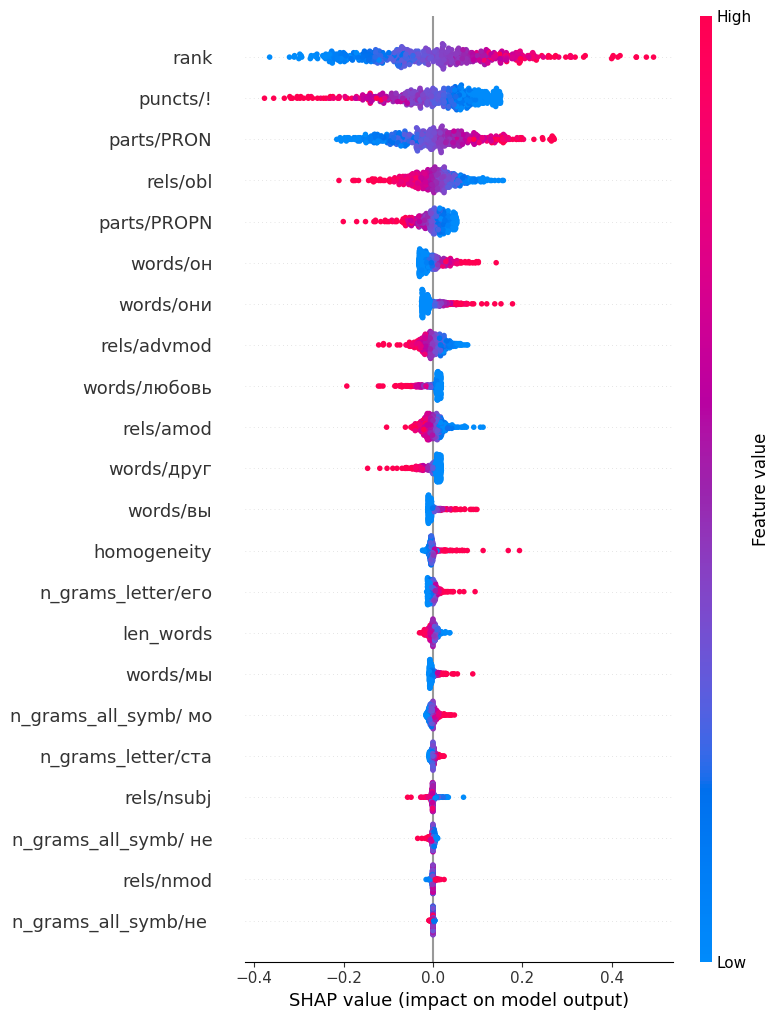

In [11]:
from keras import models
from models.fit import shap_explain
from models.data import *


d = load_data('data2')
#loaded_model = models.load_model(root + "models\\saved_models\\2per(1824) acc0.758 data1.keras")
shap_explain(d, get_names(fs), model.predict, 'model2')